<span style="font-size: 14pt">MIPT, Advancaed ML, Autumn 2017</span>

<span style="font-size: 16pt"> Seminar #0: Inroduction into Time Series Analysis

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h3> Plan </h3>
  * **About the course** (10 mimutes)
  * **Remind: Regression** (20 minutes)
  * **Simple Autoregression Model**
     - Time series example: Energy consumption data (15 minutes)
     - Build ts forecast using LR (15 minutes)
     - Practical task (20 minutes)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import Image

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sc

%matplotlib inline

In [3]:
# be careful with versions
import sys
sys.version

'3.5.4 |Anaconda 4.1.1 (64-bit)| (default, Aug 14 2017, 13:41:13) [MSC v.1900 64 bit (AMD64)]'

<h1 align="center">Course Rules</h1>

<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> Расписание, результаты смотрите на <a href="https://ml-mipt.github.io/">странице</a> курса</span>

Курс будет состоять из 13 ключевых лекций и 1-2 гостевых лекций (от лучших в стране специалистов ;)). 

**Обратная связь**
 - Мы вас просим оставлять отзывы о семинарах и лекциях (это не займёт более 1-2 минут вашего времени)
 - Домашние задания будут доступны только после оставления обратной связи

**Домашнее задание**
- Будет выдаваться после каждого семинара, иногда это будут контексты
- Задание необходимо сдать в течении 6 дней после семинара
- Задание оценивается  1, если вы его сделали достаточно хорошо
- Задание оценивается  0, если вы не выполнили задание или сделали много ГРУБЫХ ошибок (или списали, или дали списать) 
- Задания, сданные после дедлайна, не проверяются

**Контексты**
- Вы получаете 1-2 балл, если побили бейзлайн и коротко текстом описали решение, 0 - если нет
- Бонусы получают первые три человека в каждой в группе

**Экзамен**
- Будет экзамен, автоматов не будет
- Будет список вопросов 
- Будет теор. минимум

**Оценка**
Финальная оценка будет вычисляться, как
    $$mark = (c_1 \cdot hw\_credits + c_2 \cdot contest\_credits + c_3 \cdot exam\_creidts)$$
коэффициенты будут объявлены позже

<h1 align="center"> Linear Regression </h1>
** Вопросы **
* Как выглядит решающее правило в LR?
* Как настриваются веса в LR?
* Какие проблемы возникают при обучении LR? С чем связано переобучение LR?
* Что такое гребневая регрессия и Лассо Тибширани?

## For Regression

## $$Y = \mathbf{R},~X\in \mathbf{R}^d$$
## $$y_{predict}(x) = <w, x> $$ 
## $$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$

### Linear Regression (Equation)

## $$ g(x, \alpha) = \sum_{i}^{n} \alpha_i f_i(x) $$
## $$ Q(\alpha) = \| F\alpha - y \|^2 $$

Normal Equation

## $$ \alpha^{*} = (F^{T}F)^{-1}F^{T}y = F^{+}y $$
## $$ Q(\alpha^{*}) = \| P_{F}y - y \|^2 $$
## $$ P_{F} = FF^{+} $$

## Регуляризация

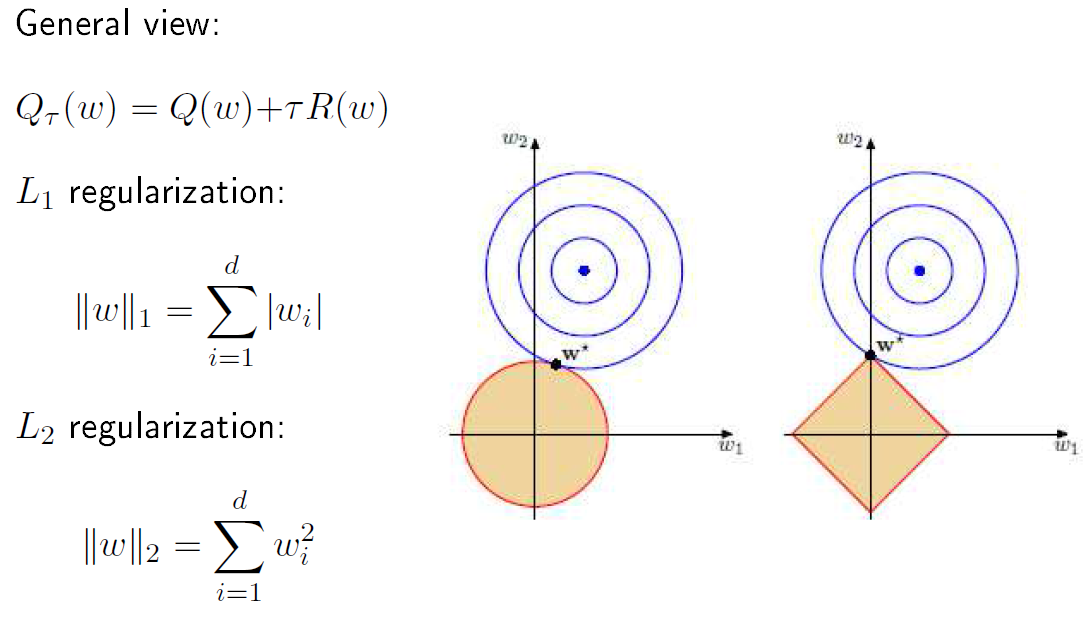

In [4]:
Image('pic/Regularization.png', retina=True)

### Regularization for LR:

## $$ Q_{\tau}(\alpha) = \| F\alpha - y\|^2 + \tau \| \alpha \|^2 $$

vs

## $$ \sum_{i=1}^{n} |\alpha_i| \leq C $$

Student Question: Whatr Esle?

See <a href='http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf'> К.В. Воронцов, Методы машинного обучения по прецедентам </a>
* глава 5.3 Линейная регрессия

In [5]:
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#examples-using-sklearn-linear-model-linearregression", width=800, height=400)

In [6]:
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge", width=800, height=400)

## Underfitting VS Overfitting

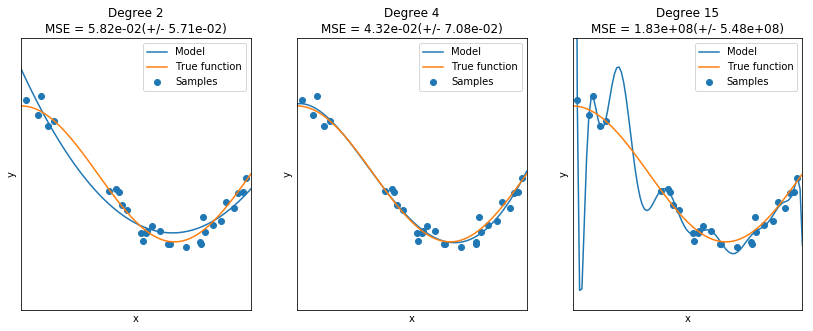

In [7]:
np.random.seed(0)

n_samples = 30
degrees = [2, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X) # ещё один способ определить функцию: с помощью lambda-функции

# Data Generation
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = model_selection.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

<h1 align="center"> Simple Autoregression Model</h1>

## Пример временого ряда: energy consumption data

In [8]:
# Caution: different version of pandas needs differnt codes!!!
# ts = pd.read_csv('consumption_train.csv', sep='\t', decimal=',')
ts = pd.read_csv('consumption_train.csv', sep='\t', decimal='.', parse_dates=True, dayfirst=False, index_col='Dates') 
ts[['EnergyCons']].head(10)

,EnergyCons
Dates,
2005-01-01 00:00:00,1290
2005-01-01 01:00:00,1266
2005-01-01 02:00:00,1273
2005-01-01 03:00:00,1280
2005-01-01 04:00:00,1293
2005-01-01 05:00:00,1263
2005-01-01 06:00:00,1279
2005-01-01 07:00:00,1304
2005-01-01 08:00:00,1330


Временной ряд - это последовательность значний некоторой величины, зафиксированные через одинаковые промежутки времени.

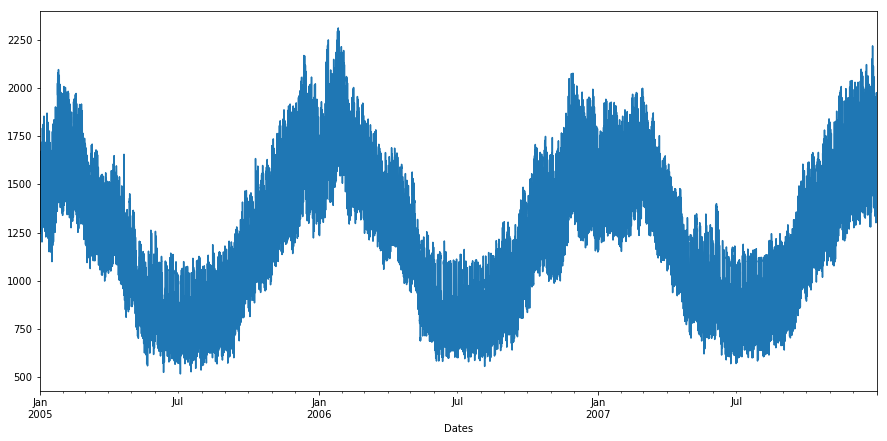

In [9]:
# Plot time series
ts['EnergyCons'].plot(figsize=(15,7))

** Вопрос: ** Какие закономерности в данных можно наблюдать на картинке?

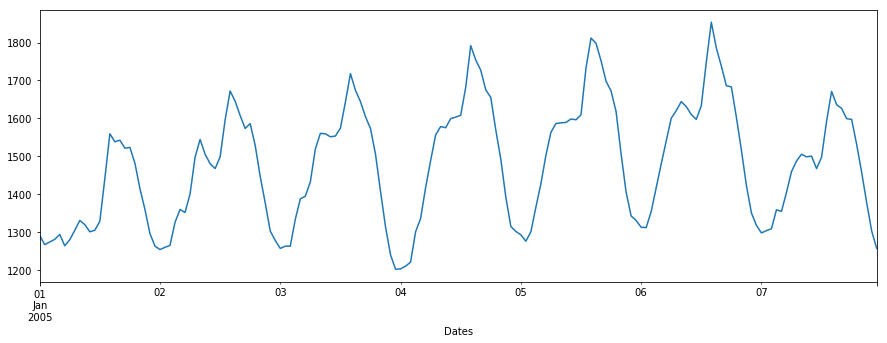

In [10]:
# the first week
# ts.ix['2005-01-01 00:00:00':'2005-01-07 23:00:00', 'EnergyCons'].plot(figsize=(15,5)) # Python 2
ts.loc['2005-01-01 00:00:00':'2005-01-07 23:00:00', 'EnergyCons'].plot(figsize=(15,5)) # Python 3

** Вопрос: ** Какие закономерности в данных можно наблюдать на картинке?

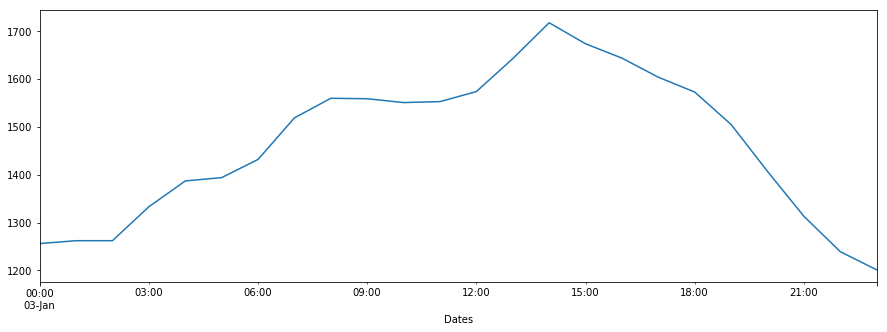

In [11]:
# the first day
ts.loc['2005-01-03 00:00:00':'2005-01-03 23:00:00', 'EnergyCons'].plot(figsize=(15,5))

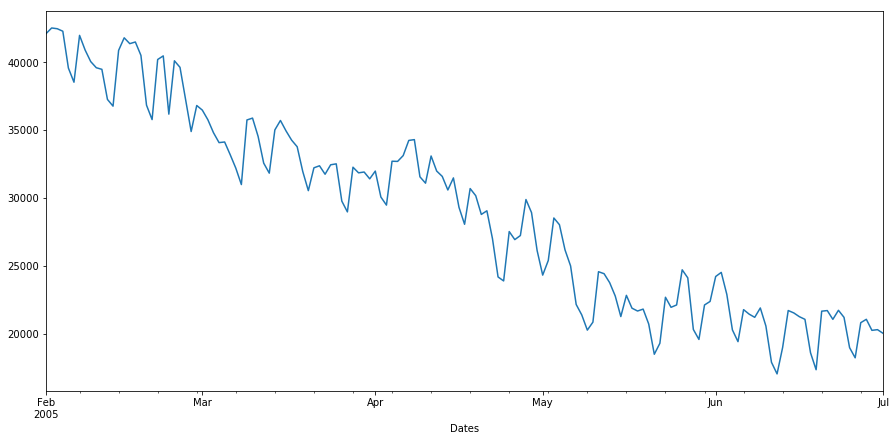

In [12]:
ts['EnergyCons'].loc['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum().plot(figsize=(15,7))

** Вопрос: ** Какие закономерности в данных можно наблюдать на картинке?

## STL-decomposition: разложение ВР на тренд-сезонность-шум

In [13]:
import statsmodels.api as sm

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


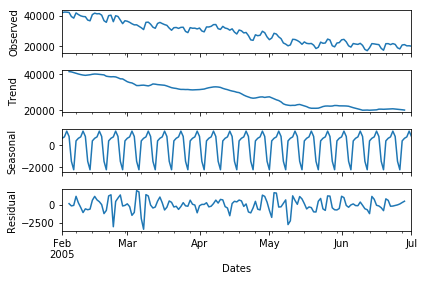

In [14]:
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].loc['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum())
resplot = res.plot()

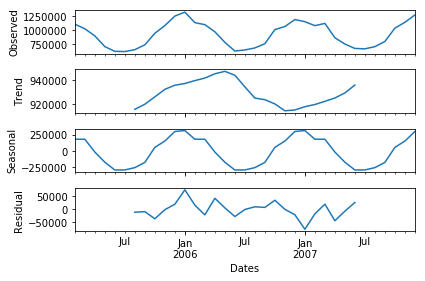

In [15]:
# fig = plt.figure(figsize=(15,10))
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].loc['2005-02-01 00:00':'2008-01-01 23:00'].resample("M").sum())
resplot = res.plot()

** Вопрос: ** Как спрогнозировать такой временной ряд?
 - Подсказка: как описать зависимость последующих значений временного ряда от предыдущего?

## Autoregression: build matrix of autoregression

In [16]:
sc.linalg.hankel([1,2,3,4], [4,7,7,8,9])

array([[1, 2, 3, 4, 7],
       [2, 3, 4, 7, 7],
       [3, 4, 7, 7, 8],
       [4, 7, 7, 8, 9]])

In [17]:
def get_autoregrmatrix(x,h,K):
    L = len(x)
    X = sc.linalg.hankel(x[:L-h-K+1], 
                          np.hstack((x[-K],x[-K:-1]))) # is needed to repeat x[-K] in second part
    y = x[K+h-1:]
    return X,y

## Forecast for next hour (h=1) using 1 week history (K=168)

In [18]:
K=168
h = 1 # delay

x_train = ts['EnergyCons'].loc['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].loc['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

In [19]:
print (X_train.shape)
print (y_train.shape)

(8593, 168)
(8593,)


In [20]:
# Matrix of Samples and Regressors
X_train

array([[1290, 1266, 1273, ..., 1377, 1302, 1256],
       [1266, 1273, 1280, ..., 1302, 1256, 1257],
       [1273, 1280, 1293, ..., 1256, 1257, 1267],
       ..., 
       [1332, 1293, 1225, ..., 1645, 1541, 1394],
       [1293, 1225, 1235, ..., 1541, 1394, 1349],
       [1225, 1235, 1222, ..., 1394, 1349, 1312]], dtype=int64)

In [21]:
# Target Vector
y_train

Dates
2005-01-08 00:00:00    1257
2005-01-08 01:00:00    1267
2005-01-08 02:00:00    1274
2005-01-08 03:00:00    1339
2005-01-08 04:00:00    1376
2005-01-08 05:00:00    1400
2005-01-08 06:00:00    1439
2005-01-08 07:00:00    1504
2005-01-08 08:00:00    1557
2005-01-08 09:00:00    1518
2005-01-08 10:00:00    1500
2005-01-08 11:00:00    1501
2005-01-08 12:00:00    1546
2005-01-08 13:00:00    1645
2005-01-08 14:00:00    1718
2005-01-08 15:00:00    1701
2005-01-08 16:00:00    1655
2005-01-08 17:00:00    1635
2005-01-08 18:00:00    1616
2005-01-08 19:00:00    1530
2005-01-08 20:00:00    1435
2005-01-08 21:00:00    1349
2005-01-08 22:00:00    1266
2005-01-08 23:00:00    1247
2005-01-09 00:00:00    1227
2005-01-09 01:00:00    1252
2005-01-09 02:00:00    1250
2005-01-09 03:00:00    1298
2005-01-09 04:00:00    1355
2005-01-09 05:00:00    1384
                       ... 
2005-12-30 19:00:00    1682
2005-12-30 20:00:00    1586
2005-12-30 21:00:00    1484
2005-12-30 22:00:00    1401
2005-12-30 23:

Train score: 0.997, Test score: 0.991


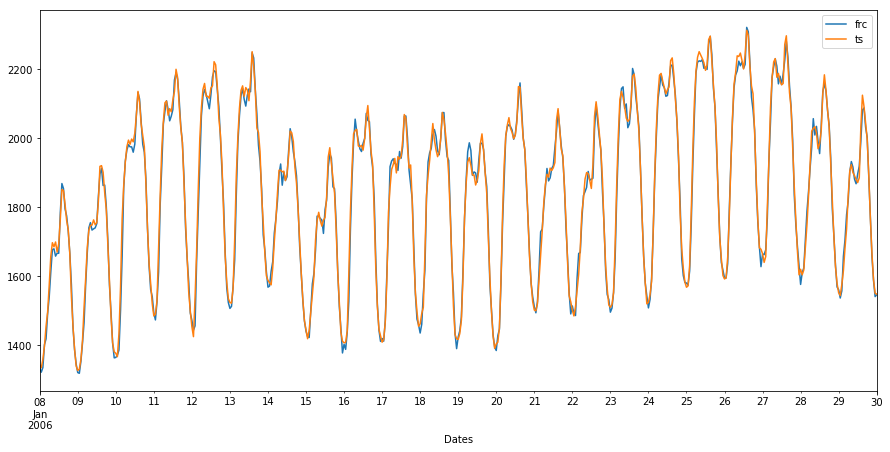

In [22]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,7))

## Try another delay: h=168

Train score: 0.933, Test score: 0.839


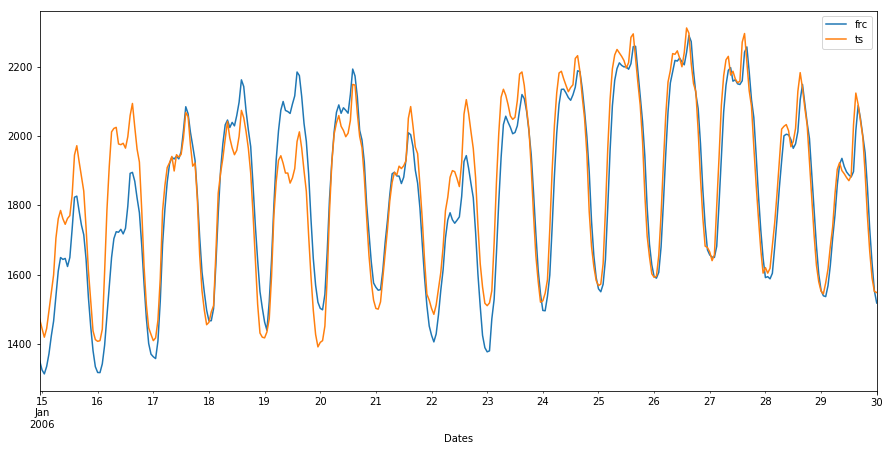

In [23]:
K=168
h = 168 # delay

x_train = ts['EnergyCons'].loc['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].loc['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,7))

## Practical Task
Draw dependence of the cross_validation score (linear_regression.score) on the horizon of the forecast for LR model in the case of energy consumption forecasting. You should write code to show dependence for $h=1,2,\dots, 720$. You can choose amount of regressors for LR in experiment as much as you want.   

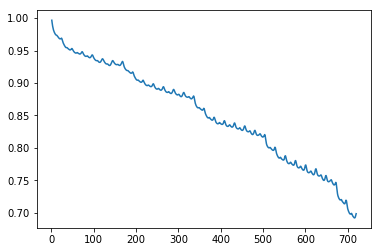

In [57]:
import math
K = 168
no_horizons = 720
# Solution wirte there
table = []
for h in range(no_horizons):
    x_train = ts['EnergyCons'].loc['2005-01-01 00:00:00':'2006-01-01 00:00:00']
    
    # стоит обсудить со студентами, а какие регрессоры брать в зависимости от горизонта прогнозирования
#     в предлагаемом ниже решении количество регрессоров равно 168 (последняя неделя известных данны) для любого горизонта истории
# можно предложить попробовать увеличивать кол-во регрессоров в зависимости от горизонта истории, например:
# на каждые 24 часа горизонта приходится ровно одна неделя истории, но при этом расчет может идти очень долго (оставить как ДЗ)

    X_train, y_train = get_autoregrmatrix(x_train,h+1,K) 
    linear_regression = LinearRegression()
    linear_regression.fit(X_train,y_train)
    table.append(linear_regression.score(X_train, y_train))

plt.plot(range(1,no_horizons+1), table)

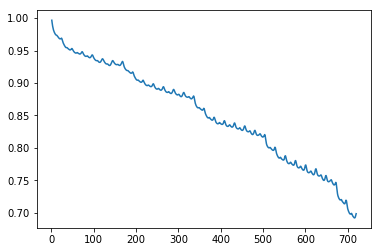

In [58]:
plt.plot(range(1,no_horizons+1), table)

We can clearly see that if horizon increases the ocurency decreases. 

<h1 align="center"> Conclusion </h1>

** Your fitback ** 
  * оцените <a href="https://drive.google.com/open?id=1S18k3NtsP_OuWhWi_tHhiiLUBprsbWipAzx54Ys4JFQ"> семинар </a>

## Answer questions 
  ** 1. What is time series? **
     
     <Answer>
       
  ** 2. What is delay and horizon of forecast?**
   
     <Answer>
         
  ** 3. What is Least Squared Method for Linear Regression?**
  
     <Answer>
          
  ** 4. What is the solution of linear regression via LS method (in terms of matrix $X, \alpha, Y$)? **
  
     <Answer>
          
  ** 5. Write down main problems of LS method. **
  
     <Answer>
          
  ** 6. What hankel transformation of a matrix? **
  
     <Answer>
          